In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import ast
from collections import defaultdict
from tqdm import tqdm

In [16]:
# Set the path to the directory containing the subfolders
parent_directory = './runs'

# This list will hold all the numbers found
successes = {}
times = {}
args = {}
# Regular expression to find numbers
number_pattern = re.compile(r'\d+')
all_files = list(os.walk(parent_directory))
for root, dirs, files in tqdm(all_files):
    for file in files:
        if file.endswith(".log"):  # Checks if the file is a log file
            file_path = os.path.join(root, file)
            with open(file_path, 'r') as f:
                lines = f.readlines()
                args[file] = ast.literal_eval(lines[1])
                # print(float(file_path.split("--")[1].split("/")[0].replace("-", ".")))
                time = float(file_path.split("--")[1].split("/")[0].replace("-", "."))
                if(args[file]["adaptive_n"]):
    
                    continue
                
                
                for i, line in enumerate(lines):
                    if line.startswith("Solved:"):
                        
                        successes[file] = int(("True" in lines[i].strip()))

                        if (args[file]["adaptive_n"] and not successes[file]):
                            print(file_path)
                    if(line.startswith("Time:")):
                        print(file_path)
                        times[file] = float(lines[i].strip().replace("Time: ", ""))
           


100%|██████████| 501/501 [00:00<00:00, 8882.33it/s]

./runs/prm-46--20240522-130605/1716397572.0253527/1716397572.0273225.log
./runs/prm-11--20240522-124417/1716396264.78018/1716396264.7816355.log
./runs/prm-28--20240522-130604/1716397571.623631/1716397571.625588.log
./runs/prm-23--20240522-122704/1716395238.3744156/1716395238.3803313.log
./runs/prm-30--20240522-124417/1716396264.8394594/1716396264.8407543.log
./runs/prm-7--20240522-130604/1716397571.3195965/1716397571.3211343.log
./runs/prm-23--20240522-130604/1716397571.199378/1716397571.2021313.log
./runs/prm-24--20240522-124417/1716396264.6265817/1716396264.6280007.log
./runs/prm-28--20240522-122704/1716395239.2444103/1716395239.2498918.log
./runs/prm-49--20240522-122704/1716395238.0824003/1716395238.0872507.log
./runs/prm-33--20240522-122704/1716395239.2444634/1716395239.2495985.log
./runs/prm-20--20240522-124417/1716396265.157938/1716396265.1593323.log
./runs/prm-34--20240522-124417/1716396265.0109122/1716396265.0141864.log
./runs/prm-19--20240522-122704/1716395238.374434/171639523

In [14]:
print(len(times))
print(len(successes))
print(len(args))

plot_points = {}
plot_successes = defaultdict(list)
plot_times = defaultdict(list)
counter = 0
print(args.keys())
for key in times:
    print(key)
    if(args[key]["adaptive_n"]):
        counter += 1
    plot_successes[(args[key]["min_samples"], args[key]["max_samples"], args[key]["adaptive_n"])].append(successes[key])
    plot_times[(args[key]["min_samples"], args[key]["max_samples"], args[key]["adaptive_n"])].append(times[key])

49
0
250
dict_keys(['1716398968.9906268.log', '1716397572.0273225.log', '1716396264.7816355.log', '1716397571.668131.log', '1716397571.625588.log', '1716398969.3392012.log', '1716395238.3803313.log', '1716396264.8407543.log', '1716397571.9900737.log', '1716395117.364535.log', '1716398999.7799118.log', '1716395117.355879.log', '1716397571.3211343.log', '1716395238.0873575.log', '1716397571.2021313.log', '1716396264.6280007.log', '1716395239.2502725.log', '1716395073.5171156.log', '1716398968.8651848.log', '1716395231.5019877.log', '1716395048.4547536.log', '1716396265.2938652.log', '1716395117.3558736.log', '1716398969.9364176.log', '1716395239.2498918.log', '1716395238.3804123.log', '1716398969.2280555.log', '1716395238.0872507.log', '1716397571.4995565.log', '1716395073.5154283.log', '1716398968.8341482.log', '1716397571.9908373.log', '1716395231.6816282.log', '1716395239.2495985.log', '1716397571.6417263.log', '1716397571.679757.log', '1716396265.1593323.log', '1716395231.2619493.log

KeyError: '1716397572.0273225.log'

/Users/aidancurtis/miniforge3/envs/nonasy/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/aidancurtis/miniforge3/envs/nonasy/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/aidancurtis/miniforge3/envs/nonasy/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/aidancurtis/miniforge3/envs/nonasy/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/aidancurtis/miniforge3/envs/nonasy/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/aid

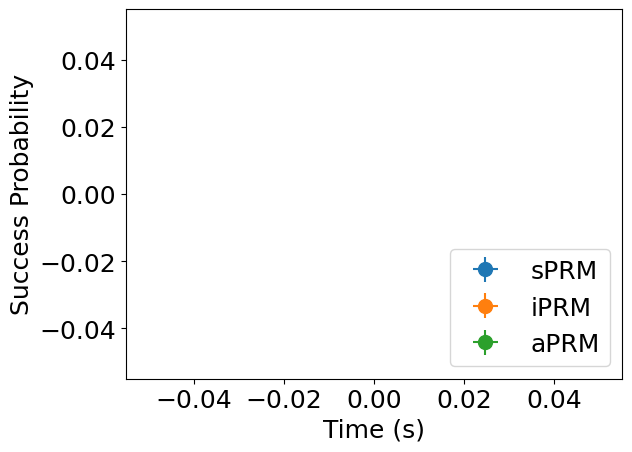

In [8]:

plt.rcParams.update({'font.size': 18})
plt.figure()
legend = ["sPRM", "iPRM", "aPRM"]
# Plot the sPRM results
for condition in legend:
    xs = []
    ys = []
    x_errs = []
    y_errs = []
    ns = []
    for k in plot_successes:
        min_samples, max_samples, adaptive_n = k
        
        if((condition == "iPRM" and (min_samples != max_samples-1 and not adaptive_n)) or
           (condition == "sPRM" and (min_samples == max_samples-1 and not adaptive_n)) or
           (condition == "aPRM" and (adaptive_n))):
            if(condition == "aPRM"):
                print(len(plot_times[k]))
            xs.append(np.mean(plot_times[k]))
            ys.append(np.mean(plot_successes[k]))
            x_errs.append(np.std(plot_times[k])/np.sqrt(len(plot_times[k])))
            y_errs.append(np.std(plot_successes[k])/np.sqrt(len(plot_successes[k])))
            ns.append(max_samples)

    plt.errorbar(xs, ys, xerr=x_errs, yerr=y_errs, markersize=10, fmt='o')

plt.legend(legend, loc="lower right")
plt.ylabel("Success Probability")
plt.xlabel("Time (s)")
plt.savefig('../../../figures/sample_plot.pdf', format='pdf',  bbox_inches='tight')